## ML FIRST PART IN THE PW

## Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

### 1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.




### 2. Missing at Random MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.
Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## 3. Missing data not at random (MNAR)
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

## Examples

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# CHECKING NULL VALUES

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.shape

(891, 15)

In [9]:
# DROPPING NULL VALUES ACCORDING TO ROWS

df.dropna().shape

(182, 15)

In [10]:
# DROPPING THE NULL VALUES ACCORDING TO COLUMNS

# IN THIS RESULT WE CAN SEE THAT THE COLUMN CONTAINING NULL VALUES ARE DELETED

df.dropna(axis = 1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values
### 1- Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

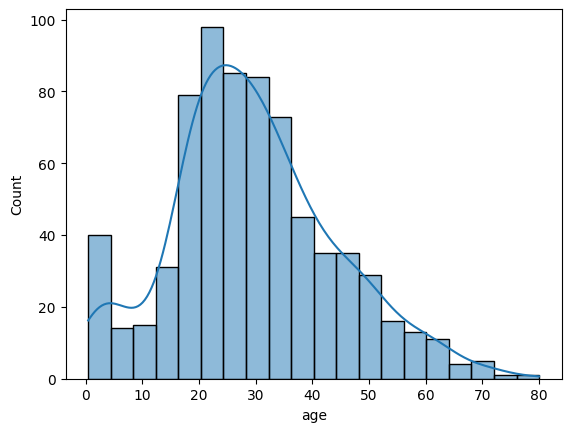

In [11]:
sns.histplot(df['age'],kde=True)

### AS WE CAN CLEARLY SEE THAT THE DISTRIBUTION OF THE AGE COLUMN IS NORMALLY DISTRIBUTED THATS WHY WE CAN FILL THE NULL VALUES WITH THE HELP OF MEAN

In [12]:
df['Age_Mean'] = df['age'].fillna(df['age'].mean())

In [16]:
df[['Age_Mean','age']]

,Age_Mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: xlabel='Age_Mean', ylabel='Count'>

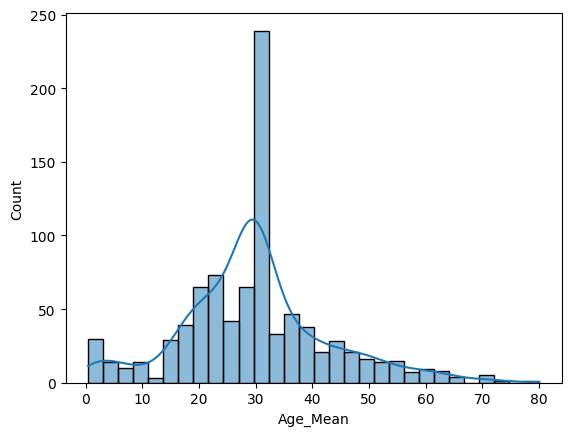

In [17]:
sns.histplot(df['Age_Mean'],kde=True)

In [18]:
## MEan Imputation Works Well when we have normally distributed data

### 2. Median Value Imputation- If we have outliers in the dataset use median

In [19]:
df['age_median']=df['age'].fillna(df['age'].median())

<Axes: xlabel='age_median', ylabel='Count'>

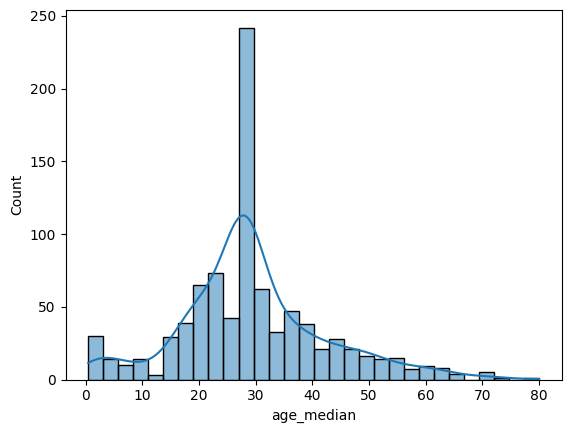

In [20]:
sns.histplot(df['age_median'],kde=True)


In [22]:
df[['age_median','Age_Mean','age']]

,age_median,Age_Mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 3. Mode Imputation Technqiue--Categorical values

In [23]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [24]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [26]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [27]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [28]:
df['embarked_mode'].isnull().sum()

0

In [29]:
df['embarked'].isnull().sum()

2

## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [30]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [31]:
n_class_0,n_class_1

(900, 100)

In [32]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [33]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [34]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [35]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [36]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [37]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [38]:
df_minority_upsampled.shape

(900, 3)

In [39]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [40]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [41]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

## Down Sampling

In [42]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

0    900
1    100
Name: target, dtype: int64


In [43]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [44]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )

In [45]:
df_majority_downsampled.shape

(100, 3)

In [46]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [47]:
df_downsampled['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [48]:
from sklearn.datasets import make_classification

In [49]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [50]:
X.shape

(1000, 2)

In [51]:
len(y[y==1])

100

In [52]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [53]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

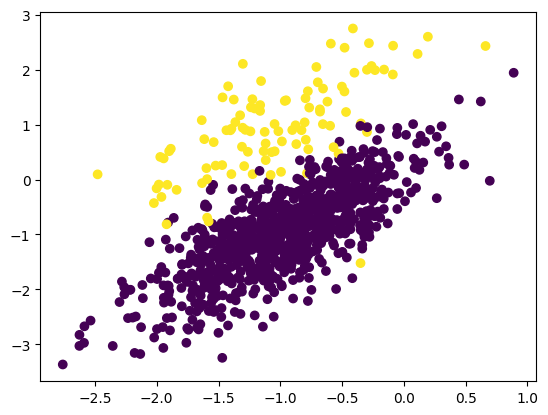

In [54]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [55]:
!pip install imblearn

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [58]:
X.shape

(1800, 2)

In [59]:
y.shape

(1800,)

In [60]:
len(y[y==0])

900

In [61]:
len(y[y==1])

900

In [62]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

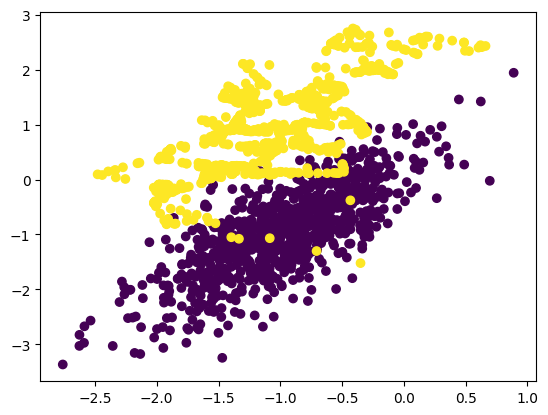

In [63]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

## Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

## 1. Linear Interpolation

---



In [64]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

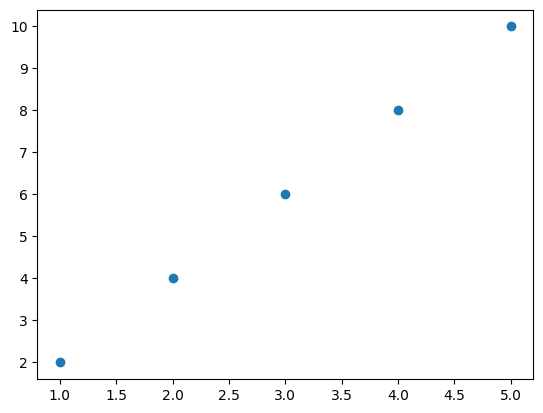

In [65]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [66]:
## interpolate the data using linear interpolation
x_new=np.linspace(1,5,10) ## create new x values
y_interp=np.interp(x_new,x,y)

In [67]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

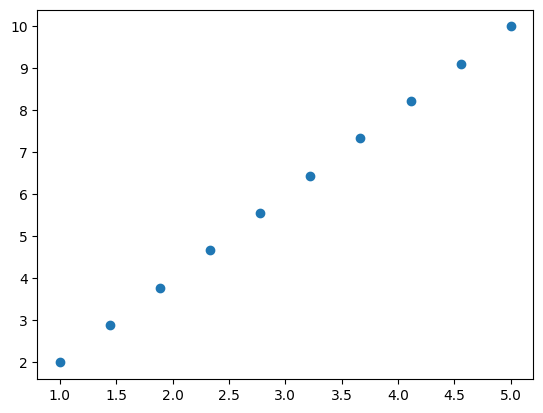

In [68]:
plt.scatter(x_new,y_interp)

## 2. Cubic Interpolation With Scipy

In [69]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [70]:
from scipy.interpolate import interp1d

In [71]:
##create a cubic interpolation function
f=interp1d(x,y,kind='cubic')

In [72]:
# interpolate the data
x_new = np.linspace(1, 5, 10)
y_interp=f(x_new)

In [73]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

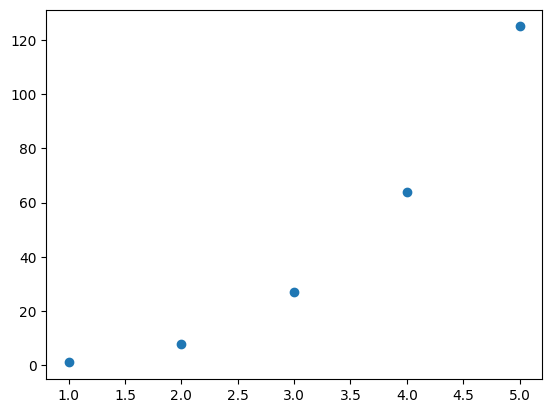

In [74]:
plt.scatter(x,y)

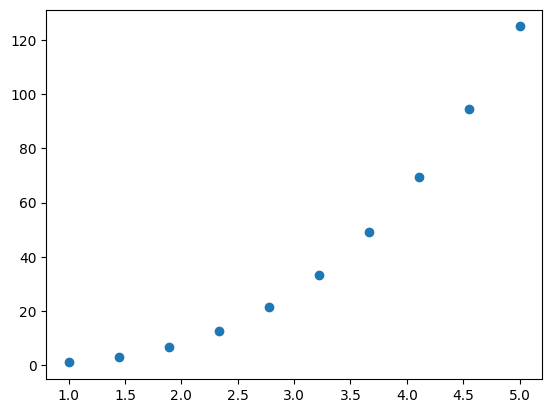

In [75]:
plt.scatter(x_new,y_interp)

## 3. Polynomial Interpolation

In [76]:
import numpy as np

# create some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

In [77]:
# interpolate the data using polynomial interpolation
p=np.polyfit(x,y,2)

In [78]:
x_new = np.linspace(1, 5, 10) # create new x values
y_interp = np.polyval(p, x_new) # interpolate y values

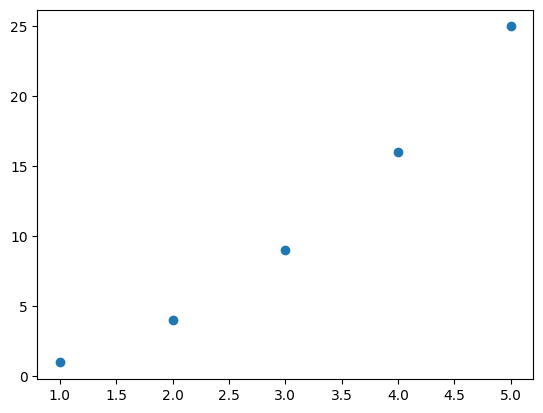

In [79]:
plt.scatter(x,y)

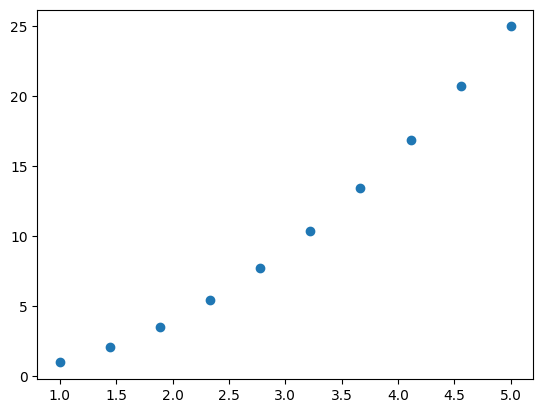

In [80]:
plt.scatter(x_new,y_interp)

## 5 number Summary And Box Plot

In [81]:
## Minimum,MAximum,Median,Q1,Q3,IQR

In [82]:
import numpy as np

In [83]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [84]:
minimum,Q1,median,Q3,maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [85]:
IQR=Q3-Q1
print(IQR)

35.0


In [86]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)


In [87]:
lower_fence

1.5

In [88]:
higher_fence

141.5

In [89]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

In [90]:
import seaborn as sns

<Axes: >

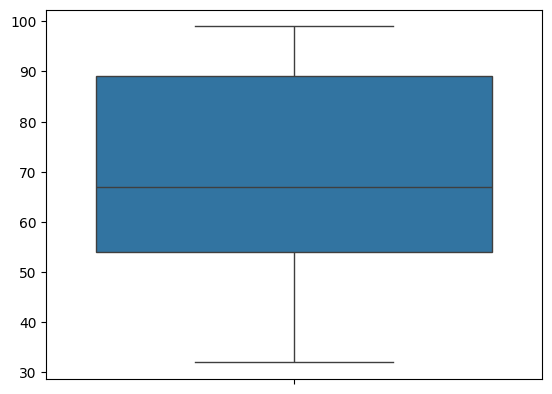

In [91]:
sns.boxplot(lst_marks)

In [92]:
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<Axes: >

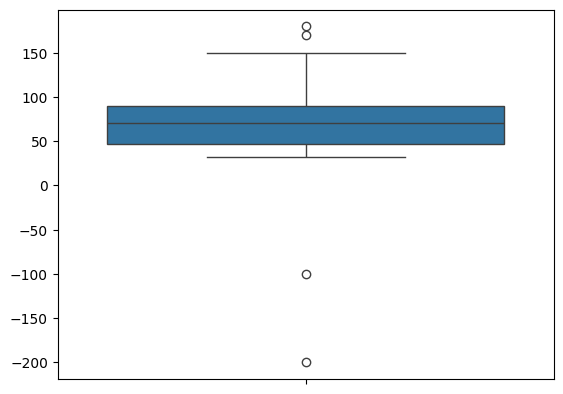

In [93]:
sns.boxplot(lst_marks)

## Standardization

In [94]:
import seaborn as sns

In [95]:
df=sns.load_dataset('tips')

In [96]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [97]:
total_bill=list(df['total_bill'])

In [98]:
total_bill

[16.99,
 10.34,
 21.01,
 23.68,
 24.59,
 25.29,
 8.77,
 26.88,
 15.04,
 14.78,
 10.27,
 35.26,
 15.42,
 18.43,
 14.83,
 21.58,
 10.33,
 16.29,
 16.97,
 20.65,
 17.92,
 20.29,
 15.77,
 39.42,
 19.82,
 17.81,
 13.37,
 12.69,
 21.7,
 19.65,
 9.55,
 18.35,
 15.06,
 20.69,
 17.78,
 24.06,
 16.31,
 16.93,
 18.69,
 31.27,
 16.04,
 17.46,
 13.94,
 9.68,
 30.4,
 18.29,
 22.23,
 32.4,
 28.55,
 18.04,
 12.54,
 10.29,
 34.81,
 9.94,
 25.56,
 19.49,
 38.01,
 26.41,
 11.24,
 48.27,
 20.29,
 13.81,
 11.02,
 18.29,
 17.59,
 20.08,
 16.45,
 3.07,
 20.23,
 15.01,
 12.02,
 17.07,
 26.86,
 25.28,
 14.73,
 10.51,
 17.92,
 27.2,
 22.76,
 17.29,
 19.44,
 16.66,
 10.07,
 32.68,
 15.98,
 34.83,
 13.03,
 18.28,
 24.71,
 21.16,
 28.97,
 22.49,
 5.75,
 16.32,
 22.75,
 40.17,
 27.28,
 12.03,
 21.01,
 12.46,
 11.35,
 15.38,
 44.3,
 22.42,
 20.92,
 15.36,
 20.49,
 25.21,
 18.24,
 14.31,
 14.0,
 7.25,
 38.07,
 23.95,
 25.71,
 17.31,
 29.93,
 10.65,
 12.43,
 24.08,
 11.69,
 13.42,
 14.26,
 15.95,
 12.48,
 29.8,
 8.52,

<Axes: ylabel='Count'>

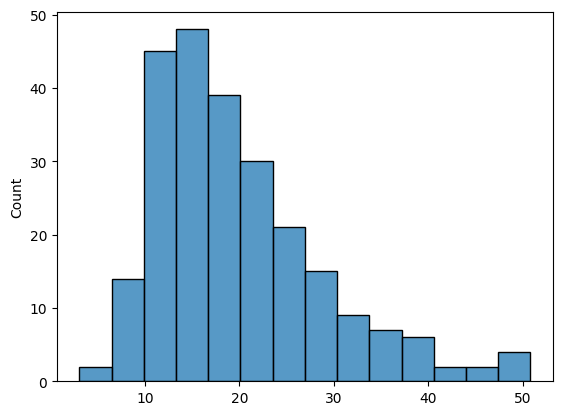

In [99]:
sns.histplot(total_bill)

In [100]:
import numpy as np
mean=np.mean(total_bill)
std=np.std(total_bill)

In [101]:
mean,std

(19.78594262295082, 8.884150577771132)

In [102]:
normalized_data=[]
for i in total_bill:
    z_score=(i-mean)/std ## z_score
    normalized_data.append(z_score)

print(normalized_data)



[-0.3147113050904943, -1.0632353132988692, 0.13777989987156145, 0.43831510316725475, 0.540744704290506, 0.6195367051545455, -1.2399545152367863, 0.7985071071171495, -0.5342033074974614, -0.5634689078183903, -1.0711145133852733, 1.7417599174609364, -0.49143050702841123, -0.15262490331304146, -0.557840907756673, 0.2019391005751361, -1.0643609133112126, -0.3935033059545337, -0.31696250511518104, 0.09725829942719795, -0.2100305039425557, 0.05673669898283484, -0.45203450659639155, 2.2100095225958003, 0.003833498402694168, -0.2224121040783337, -0.7221785095588127, -0.7987193103981653, 0.21544630072325727, -0.015301701807144186, -1.1521577142739994, -0.16162970341178864, -0.5319521074727743, 0.10176069947657193, -0.22578890411536368, 0.4810879036363046, -0.3912521059298469, -0.32146490516455467, -0.12335930299211233, 1.2926455125359115, -0.4216433062631192, -0.2618081045103532, -0.6580193088552376, -1.137524914113535, 1.1947183114620337, -0.16838330348584943, 0.2751031013774587, 1.41983831393

<Axes: ylabel='Count'>

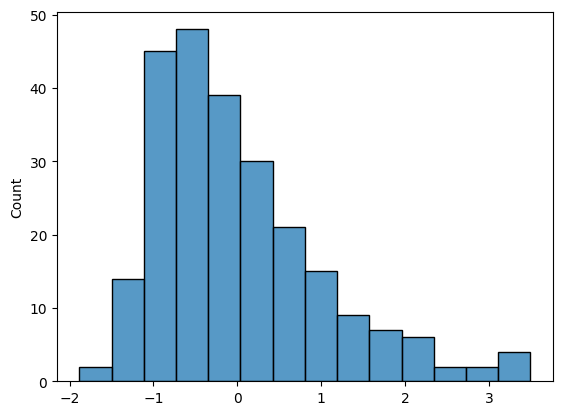

In [103]:
sns.histplot(normalized_data)

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [106]:
scaler=StandardScaler()

In [107]:
scaler

StandardScaler()

In [108]:
scaler.fit(df[['total_bill','tip']])

StandardScaler()

In [109]:
import pandas as pd
pd.DataFrame(scaler.transform(df[['total_bill','tip']]),columns=['total_bill','tips'])

,total_bill,tips
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


## Normalization-Min Max Scaler

In [110]:
import seaborn as sns

In [111]:
df=sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
min_max=MinMaxScaler()

In [114]:
min_max.fit(df[['distance','fare','tip']])

MinMaxScaler()

In [115]:
min_max.transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [116]:
min_max.fit_transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [118]:
min_max.transform([[1,3,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.02724796, 0.01342282, 0.12048193]])

##Unit Vectors.

In [119]:
import seaborn as sns

In [120]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
from sklearn.preprocessing import normalize

In [122]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [123]:
normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [124]:
import pandas as pd
pd.DataFrame(normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]),
             columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


## Target Guided Ordinal Encoding
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [125]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [126]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [127]:
## calculate the mean price for each city
mean_price=df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [128]:
## replace each city with its mean price
df['city_encoded']=df['city'].map(mean_price)

In [129]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [130]:
import seaborn as sns

sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Covariance And Correlation

In [131]:
import seaborn as sns
df=sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [132]:
##covariance
df.cov()

<ipython-input-132-1de80d35a5c9>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


In [133]:
##Pearson correlation coefficient

df.corr(method='pearson')

<ipython-input-133-732647acd25a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [134]:
##spearman rank correlation
df.corr(method='spearman')

<ipython-input-134-bdf9b37086bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000


In [135]:
df=sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [136]:
df.corr()

<ipython-input-136-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [137]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [138]:
df.corr()

<ipython-input-138-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000
